In [2]:
# Importing the ZipFile module to handle ZIP file extraction
from zipfile import ZipFile

file_name = '/content/skincancer.zip'

# Opening and extracting the contents of the ZIP file
with ZipFile(file_name, 'r') as zip:
  # Extract all the files in the ZIP archive to the current working directory
  zip.extractall()
  print('Done')


Done


In [3]:
# 'fastai' is a deep learning library built on top of PyTorch
!pip install fastai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [4]:
# 'timm' library provides a collection of pre-trained models and model architectures
!pip install timm

In [5]:
# Import essential components from the 'fastai' library for computer vision tasks
from fastai.vision.all import *

# Import the 'torch.nn' module to access neural network layers and functions from PyTorch
import torch.nn as nn
import timm

In [6]:
# 'nvidia-smi' command to display the status of the GPU, if available
!nvidia-smi

Wed Mar  5 16:08:45 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [7]:
path="/content/skincancer1/Skin cancer ISIC The International Skin Imaging Collaboration/Train"

In [8]:
# Define a series of image augmentation transformations to apply to the dataset
tfms = aug_transforms()

In [9]:
# Define a DataBlock for organizing and processing the dataset
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),  # Define input as images and output as categories (labels)
    get_items=get_image_files,           # Function to retrieve image files from the dataset
    get_y=parent_label,                 # Function to retrieve labels from folder structure (parent folder name)
    splitter=RandomSplitter(0.2, seed=50),  # Split the dataset into training (80%) and validation (20%) sets
    item_tfms=Resize(226),              # Resize all images to 226x226 pixels as a preprocessing step
    batch_tfms=[*tfms, Normalize.from_stats(*imagenet_stats)]  # Apply augmentation transforms and normalize images using ImageNet statistics
).dataloaders(path, bs=32)  # Create DataLoader objects with a batch size of 32

In [10]:
# Print the class labels (vocabulary) used for the classification task
print(dls.vocab)

['basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'squamous cell carcinoma', 'vascular lesion']


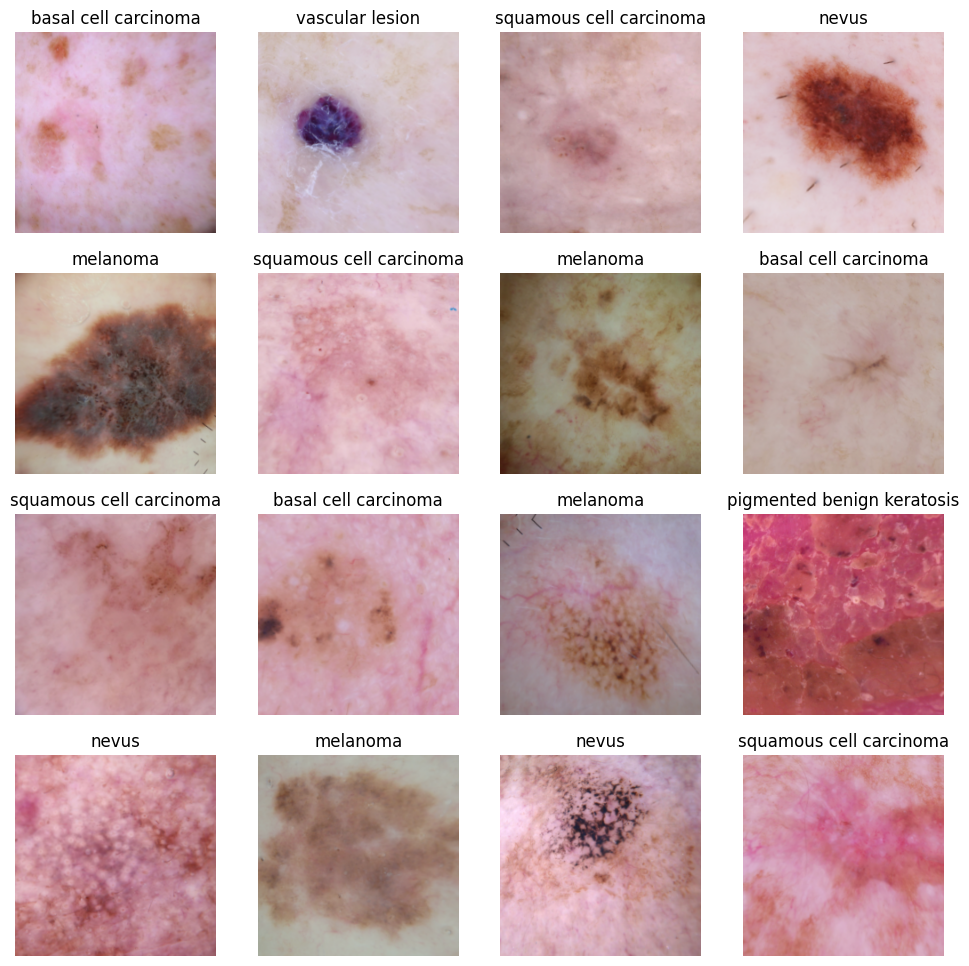

In [11]:
# Display a batch of 16 images from the training set to visualize the data
dls.show_batch(max_n=16)

In [12]:
# Create a vision learner using the ResNet18 architecture and the training/validation data (dls)
learn = vision_learner(dls, resnet18, metrics=accuracy)

# Fine-tune the model for 25 epochs (adjusting the pre-trained weights to the dataset)
learn.fine_tune(25)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 70.7MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,2.183160,1.371142,0.557457,00:51


epoch,train_loss,valid_loss,accuracy,time
0,1.554960,1.098368,0.628362,00:34
1,1.330402,1.071516,0.682152,00:36
2,1.182854,1.009645,0.687042,00:34
3,1.026727,0.956854,0.694377,00:35
4,0.869854,0.995564,0.711491,00:36
5,0.788426,1.040576,0.713936,00:35
6,0.675423,1.239826,0.696822,00:36
7,0.593604,0.993957,0.721271,00:34
8,0.491000,0.977208,0.726161,00:34
9,0.445769,1.330813,0.694377,00:33


In [13]:
# Unfreeze all layers of the model to allow further fine-tuning
learn.unfreeze()

In [14]:
# Train the model using the One Cycle learning rate policy for 10 epochs
# The learning rate range is set to vary from 1e-18 to 1e-7
learn.fit_one_cycle(10, lr_max=slice(1e-18, 1e-7))

epoch,train_loss,valid_loss,accuracy,time
0,0.076931,0.955909,0.777506,00:35
1,0.061982,0.988844,0.762836,00:34
2,0.067845,0.990999,0.775061,00:35
3,0.071033,0.956078,0.770171,00:36
4,0.075696,0.958458,0.779951,00:36
5,0.065476,0.958183,0.777506,00:34
6,0.071651,0.953987,0.775061,00:35
7,0.075047,0.977679,0.782396,00:35
8,0.075219,0.966556,0.777506,00:35
9,0.077637,0.966959,0.770171,00:35


In [15]:
# Perform Test Time Augmentation (TTA) to evaluate the model on augmented test data
preds, targs = learn.tta()

# Calculate accuracy by comparing the predicted labels to the true labels
accuracy = (preds.argmax(dim=1) == targs).float().mean()

# Print the accuracy of the model using TTA
print(f'TTA Accuracy: {accuracy*100:.4f}%')

TTA Accuracy: 80.6846%


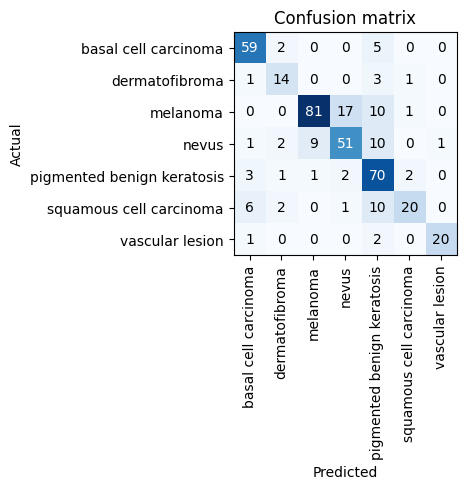

In [16]:
# Create an interpretation object to analyze the model's predictions and errors
interp = ClassificationInterpretation.from_learner(learn)

# Plot the confusion matrix to visualize the performance of the model on the dataset
interp.plot_confusion_matrix()

SuggestedLRs(valley=0.00013182566908653826)

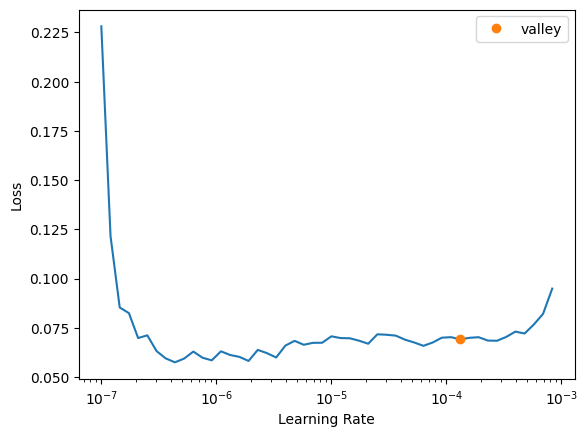

In [19]:
# Perform a learning rate finder to identify the optimal learning rate for training
learn.lr_find()

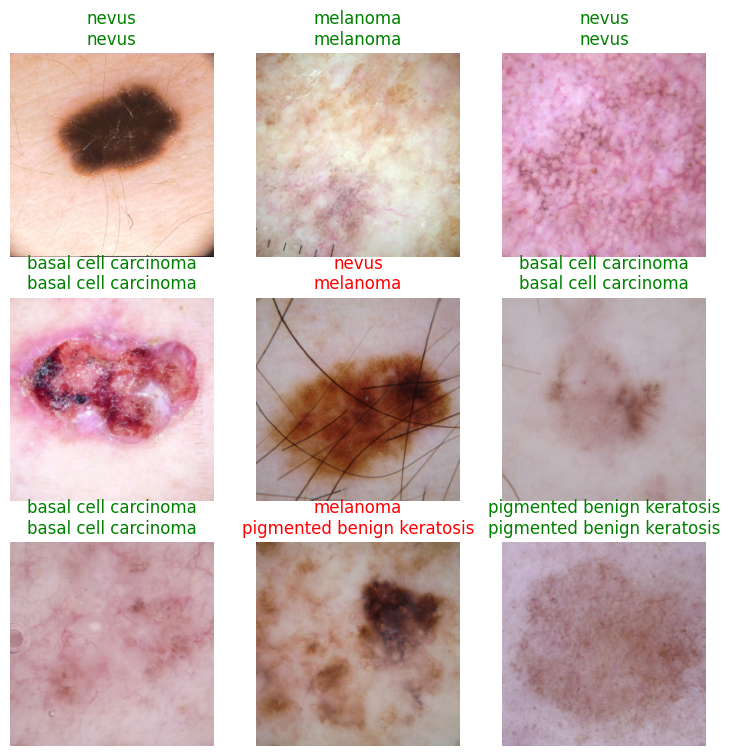

In [20]:
# Display the model's predictions alongside the ground truth for a sample of the data
learn.show_results()

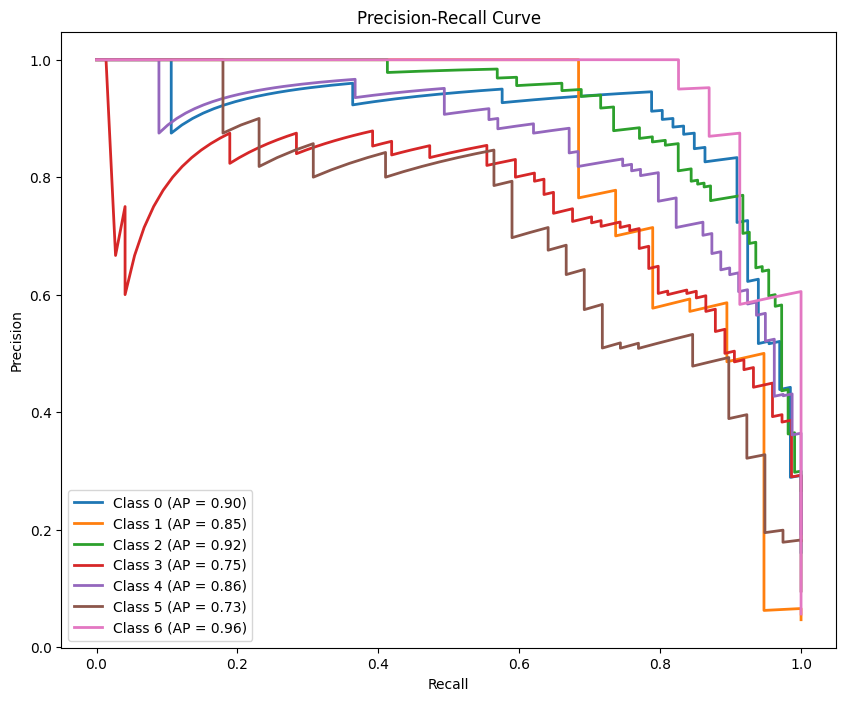

In [21]:
# Import necessary libraries for plotting precision-recall curves
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

# Get predictions and targets from the learner
preds, targs = learn.get_preds()

# Convert predictions and targets to numpy arrays for further analysis
preds = preds.numpy()
targs = targs.numpy()

# Number of classes in the classification task
n_classes = preds.shape[1]

# Initialize dictionaries to store precision, recall, and average precision for each class
precision = dict()
recall = dict()
average_precision = dict()

# Calculate precision, recall, and average precision for each class
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(targs == i, preds[:, i])
    average_precision[i] = average_precision_score(targs == i, preds[:, i])

# Plot Precision-Recall Curves for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (AP = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

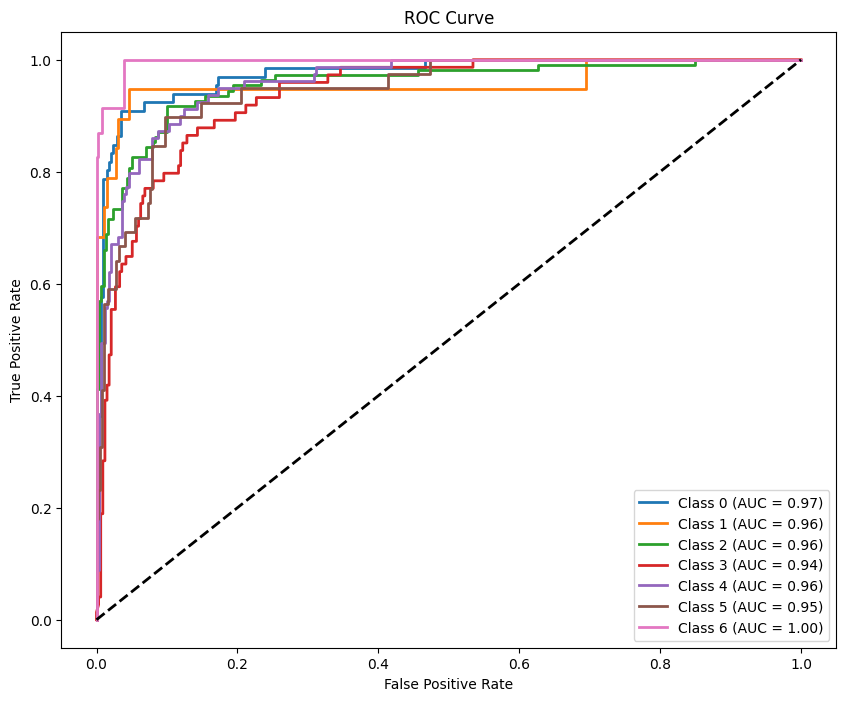

In [22]:
# Import necessary libraries for plotting ROC curves
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Get predictions and targets from the learner
preds, targs = learn.get_preds()

# Convert predictions and targets to numpy arrays for further analysis
preds = preds.numpy()
targs = targs.numpy()

# Number of classes in the classification task
n_classes = preds.shape[1]

# Initialize dictionaries to store false positive rate (fpr), true positive rate (tpr), and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(targs == i, preds[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curves for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line (random classifier) for comparison
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Label the axes and add title and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [23]:
# Import necessary components from fastai for image processing
from fastai.vision.all import *

# Load a single image from the test set
img = PILImage.create("/content/skincancer1/Skin cancer ISIC The International Skin Imaging Collaboration/Test/vascular lesion/ISIC_0024370.jpg")

# Use the trained model to make a prediction on the image
pred_class, pred_idx, pred_probs = learn.predict(img)

# Print the predicted class and the probabilities for each class
print(f"Predicted Class: {pred_class}")
print(f"Predicted Probabilities: {pred_probs}")

Predicted Class: vascular lesion
Predicted Probabilities: tensor([6.6437e-07, 2.1787e-06, 2.1805e-08, 1.7065e-07, 2.1289e-06, 2.8998e-09,
        9.9999e-01])
